In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc
%matplotlib inline

In [2]:
dtype = {
    'total_click':'uint32',
    'click_per_hour':'uint32',
    'click_per_channel':'uint32',
    'click_per_app':'uint32',
    'click_per_device':'uint32',
    'click_per_os':'uint32',
    'click_app_os':'uint32',
    'click_app_channel':'uint32',
    'click_os_channel':'uint32',
    'click_ip_app_os_channel_hour':'uint32'
}

train1 = pd.read_csv("../feature/train-day8-groupfeature.csv", dtype=dtype, skiprows=(1, 50000000))
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62945073 entries, 0 to 62945072
Data columns (total 10 columns):
total_click                     uint32
click_per_hour                  uint32
click_per_channel               uint32
click_per_app                   uint32
click_per_device                uint32
click_per_os                    uint32
click_app_os                    uint32
click_app_channel               uint32
click_os_channel                uint32
click_ip_app_os_channel_hour    uint32
dtypes: uint32(10)
memory usage: 2.3 GB


In [3]:
dtype = {
    'click_ip_app_os_device_hour':'uint32',
    'click_ip_app_os_device_minute':'uint32',
    'click_app_device':'uint32',
    'click_os_device':'uint32',
    'ip_minute_ave':'float32',
    'ip_minute_std':'float32',
    'ins_minute_ave':'float32',
    'ins_minute_std':'float32'
}

train2 = pd.read_csv("../feature/train-day8-groupadd.csv", dtype=dtype, skiprows=(1, 50000000))
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62945073 entries, 0 to 62945072
Data columns (total 8 columns):
click_ip_app_os_device_hour      uint32
click_ip_app_os_device_minute    uint32
click_app_device                 uint32
click_os_device                  uint32
ip_minute_ave                    float32
ip_minute_std                    float32
ins_minute_ave                   float32
ins_minute_std                   float32
dtypes: float32(4), uint32(4)
memory usage: 1.9 GB


In [4]:
dtype = {
    'hour':'uint8',
    'click_device_channel':'uint32',
    'click_ip_app_hour':'uint32',
    'click_ip_os_hour':'uint32',
    'click_ip_device_hour':'uint32',
    'click_ip_channel_hour':'uint32',
    'click_ip_app_os':'uint32'
}

train3 = pd.read_csv("../feature/train-day8-group2.csv", dtype=dtype, skiprows=(1, 50000000))
train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62945073 entries, 0 to 62945072
Data columns (total 7 columns):
hour                     uint8
click_device_channel     uint32
click_ip_app_hour        uint32
click_ip_os_hour         uint32
click_ip_device_hour     uint32
click_ip_channel_hour    uint32
click_ip_app_os          uint32
dtypes: uint32(6), uint8(1)
memory usage: 1.5 GB


In [5]:
dtype = {
    'click_app':'uint32',
    'click_os':'uint32',
    'click_device':'uint32',
    'click_channel':'uint32'
}

train4 = pd.read_csv("../feature/train-day8-group3.csv", dtype=dtype, skiprows=(1, 50000000))
train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62945073 entries, 0 to 62945072
Data columns (total 4 columns):
click_app        uint32
click_os         uint32
click_device     uint32
click_channel    uint32
dtypes: uint32(4)
memory usage: 960.5 MB


In [6]:
train = pd.concat([train1, train2, train3, train4], axis=1)
del train1, train2, train3, train4
gc.collect()

train.head()

,total_click,click_per_hour,click_per_channel,click_per_app,click_per_device,click_per_os,click_app_os,click_app_channel,click_os_channel,click_ip_app_os_channel_hour,...,click_device_channel,click_ip_app_hour,click_ip_os_hour,click_ip_device_hour,click_ip_channel_hour,click_ip_app_os,click_app,click_os,click_device,click_channel
0,5037,235,218,90,5010,106,25029,970445,46418,2,...,2478933,4,17,229,5,4,1436120,1058250,59716481,2526673
1,827,44,7,146,818,137,1892841,968514,359727,1,...,1588849,4,11,44,1,27,8383525,13585973,59716481,1773553
2,5873,669,193,569,5236,1434,1361832,411145,438347,2,...,1794832,75,91,629,15,128,5492776,15119852,59716481,1905461
3,2354,105,11,23,2339,143,43675,267076,18078,2,...,316338,2,36,104,2,2,792180,3079655,59716481,351470
4,42005,1639,1174,8283,37139,1033,401763,418185,38166,1,...,1295098,300,48,1456,54,232,13383590,1812466,59716481,1465070


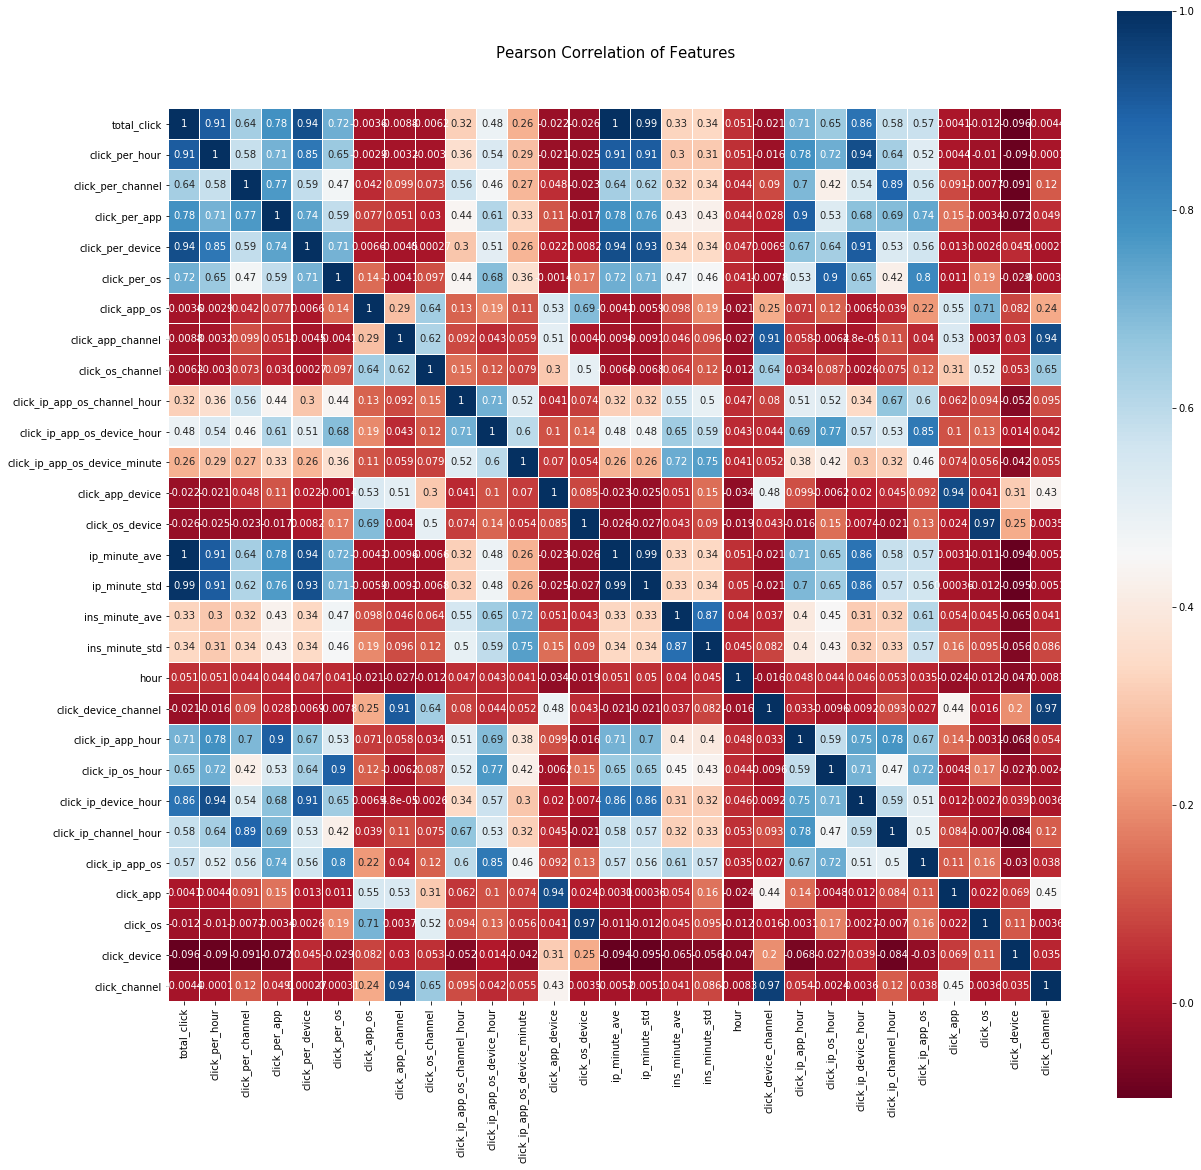

In [7]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Conclusion: (1) IP based click behavior, only use total click, perhaps click_ip_channel, click_ip_os, click_ip_app_os)

(2) remove ip_minute_ave, ip_minute_std

(3) remove ins_minute_std

(4) Use click_app, click_os, click_channel, click_device. Remove click_app_device, click_os_device, click_device_channel

In total, IP based clcik behavior, total is enough